### KNN Regression using SkLearn

In [92]:
# import all related libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [93]:
fruits_data = pd.read_table("fruit_data_with_colors.txt")   # importing the data file and saving it into a variable

In [94]:
fruits_data.head() # getting heads up with whats inside the fruit data file

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [95]:
fruits_data.shape

(59, 7)

In [96]:
fruits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [97]:
fruits_data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


From the describe function we can get insight such as the labels Minimum value is "1" and Maximmum value is "4" hence, there are total 4 fruit classes.

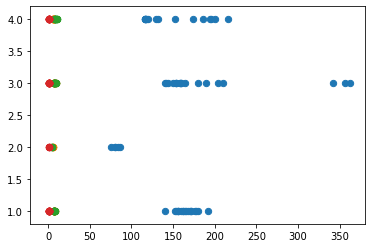

In [98]:
cmap = cm.get_cmap('gnuplot') 

plt.scatter(fruits_data[['mass']],fruits_data['fruit_label'], marker = "o",s = 40, cmap = cmap)
plt.scatter(fruits_data[['width']],fruits_data['fruit_label'], marker = "o",s = 40, cmap = cmap)
plt.scatter(fruits_data[['height']],fruits_data['fruit_label'], marker = "o",s = 40, cmap = cmap)
plt.scatter(fruits_data[['color_score']],fruits_data['fruit_label'], marker = "o",s = 40, cmap = cmap)


Lets use Scatter Matrix and try again

In [99]:
# Lets label encode the data first and try again with scatter plot in seaborn

look_up = dict(zip(fruits_data.fruit_label.unique(), fruits_data.fruit_name.unique()))


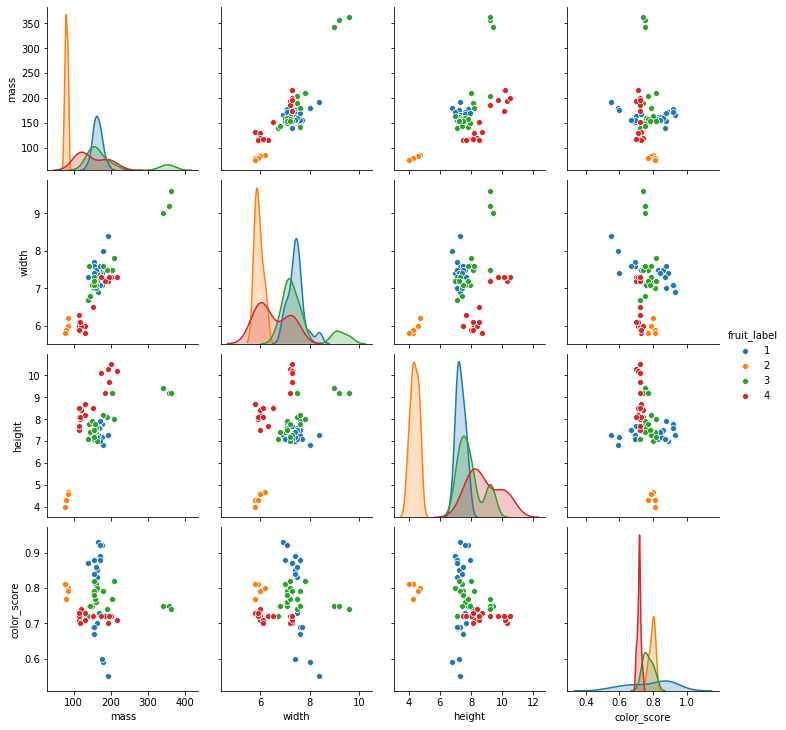

In [100]:
#sns.set_theme(style="ticks")
sns.pairplot(fruits_data, hue="fruit_label")

In [101]:
# Train Test Split

X = fruits_data[['height','width','color_score']]
y = fruits_data[['fruit_label']]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [108]:
from sklearn.neighbors import KNeighborsRegressor    # Import sklearn KNN Regressor class

knn_reg = KNeighborsRegressor(n_neighbors = 1)

knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [111]:
knn_reg.predict(X_test)

array([[3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [1.],
       [4.],
       [3.],
       [1.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.]])

In [114]:
knn_reg.score(X_test,y_test)

-0.2711864406779658

In [115]:
knn_reg.score(X_train,y_train)    # an example of over fitting

1.0

In [128]:
knn_reg = KNeighborsRegressor(n_neighbors = 15)
knn_reg.fit(X_train,y_train)
knn_reg.predict(X_test)
knn_reg.score(X_test,y_test)

0.21892655367231662

In [130]:
knn_reg.score(X_train,y_train)

0.6792553503371446